# Artificial Neural Networks

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

C:\Users\suriya.palanivel\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
tf.__version__

'2.15.0'

## Part 1 - Data Preprocessing

### Importing the Dataset

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')
x = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [4]:
x

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [5]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [6]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Encoding the Catagorical Data

#### Label Encoding the 'Gender' data

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:, 2] = le.fit_transform(x[:, 2])

In [8]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
#Female Encoded as 0

x[1]

array([608, 'Spain', 0, 41, 1, 83807.86, 1, 0, 1, 112542.58], dtype=object)

In [10]:
#Male Encoded as 1

x[722]

array([669, 'France', 1, 23, 1, 0.0, 2, 0, 0, 66088.83], dtype=object)

#### OneHotEncoding the 'Geography' data

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1])], remainder = 'passthrough')
x = ct.fit_transform(x)

In [12]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
#Spain got OneHotEncoded so that the starting 2 become 0.0 and 3rd got indicated as Spain so value precent is 1.0
x[1]

array([0.0, 0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
      dtype=object)

In [14]:
#France got OneHotEncoded so that the 1st become 1.0 and last 2 got indicated as 0.0
x[722]

array([1.0, 0.0, 0.0, 669, 1, 23, 1, 0.0, 2, 0, 0, 66088.83], dtype=object)

### Splitting the Dataset into Train and Test set

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

### Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [17]:
ann = tf.keras.models.Sequential()

### Adding Input Layer and First Hidden Layer

In [18]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

### Adding the Second hidden Layer

In [19]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

### Adding Output Layer

In [20]:
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

## Part 3 - Training the ANN

### Compile the ANN

In [21]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the training Dataset

In [22]:
ann.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100


235/235 [==============================] - 2s 2ms/step - loss: 0.6099 - accuracy: 0.6856
Epoch 2/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4816 - accuracy: 0.7957
Epoch 3/100
235/235 [==============================] - 1s 2ms/step - loss: 0.4525 - accuracy: 0.7995
Epoch 4/100
235/235 [==============================] - 1s 2ms/step - loss: 0.4380 - accuracy: 0.8012
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4264 - accuracy: 0.8083
Epoch 6/100
235/235 [==============================] - 1s 2ms/step - loss: 0.4157 - accuracy: 0.8116
Epoch 7/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.8156
Epoch 8/100
235/235 [==============================] - 1s 2ms/step - loss: 0.3925 - accuracy: 0.8180
Epoch 9/100
235/235 [==============================] - 1s 2ms/step - loss: 0.3831 - accuracy: 0.8235
Epoch 10/100
235/235 [==============================] - 0s 2ms/step - loss: 0.3757 - accu

## Part 4 - Making the prediction and evaluvating the model

### Predicting the Result of One Observation

Data for the Observation


Geography : France

Credit Score : 600

Gender : Male

Age : 40 years old

Tenure : 3 years

Balance : $60,000

Number of Products : 2

Has Credit Card : Yes

Active Member : Yes

Estimated Salary : $50,000

In [28]:
Result = ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]))>0.5
print("Will the customer leave the Bank?")
print('No') if Result == False else print('Yes')

1/1 [==============================] - 0s 47ms/step
Will the customer leave the Bank?
No


#### Predicting the test result

In [25]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

79/79 [==============================] - 0s 2ms/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


#### Making the Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1923   80]
 [ 264  233]]


0.8624

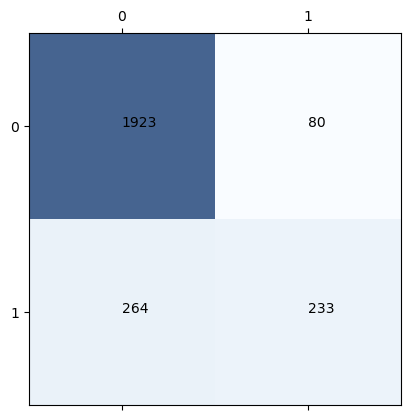

In [27]:
plt.matshow(cm , cmap = 'Blues', alpha = 0.75)

for i in range(2):
    for j in range(2):
        plt.text(x = j, y = i, s = cm[i,j])

plt.show()